In [ ]:
! pip install -q kaggle
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jety2021329206","key":"7da1c41ea1dd27e698e2a83cd7eefb73"}'}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/



In [ ]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download -c 'aptos2019-blindness-detection'

100% 9.51G/9.51G [01:55<00:00, 41.0MB/s]
100% 9.51G/9.51G [01:55<00:00, 88.4MB/s]


In [ ]:
! mkdir train

In [ ]:
! unzip aptos2019-blindness-detection


In [ ]:
from numpy.random import seed
seed(2)
import random
import numpy as np
import tensorflow as tf
random.seed(2)
np.random.seed(2)
tf.random.set_seed(2)
import tensorflow as tf
from tensorflow import keras
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.python.data import Dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
print(tf.__version__)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator




In [ ]:
import os
blnd_img=list()
for file in os.listdir("/content/train/train_images"):
    #if file.endswith(".jpg"):
      #print(1)

        #print(os.path.join('/content/jpg', file))
        img=blnd_img.append(os.path.join("/content/train/train_images",file))
        #print(blnd_img)

In [ ]:
blnd_df = pd.DataFrame(blnd_img)
blnd_df['colFromIndex'] = blnd_df.index
blnd_df = blnd_df.sort_values([0, 'colFromIndex'])
blnd_df=blnd_df.reset_index()
len(blnd_df)


3662

In [ ]:
label_dataframe = pd.read_csv('/content/train.csv')
label_dataframe


,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0
...,...,...
3657,ffa47f6a7bf4,2
3658,ffc04fed30e6,0
3659,ffcf7b45f213,2
3660,ffd97f8cd5aa,0


In [ ]:
label_dataframe['colFromIndex'] = label_dataframe.index
label_dataframe= label_dataframe.sort_values(['id_code','colFromIndex'])
label_dataframe=label_dataframe.reset_index()
#blnd_df
label_dataframe.head()

,index,id_code,diagnosis,colFromIndex
0,0,000c1434d8d7,2,0
1,1,001639a390f0,4,1
2,2,0024cdab0c1e,1,2
3,3,002c21358ce6,0,3
4,4,005b95c28852,0,4


In [ ]:
#from keras.preprocessing.image import img_to_array
i=0
import cv2
import numpy as np
while i<len(blnd_df[0]):
  a=cv2.imread(blnd_df[0][i])
  a=cv2.resize(a,(32,32))
  #a=img_to_array(a)
  #a=np.expand_dims(a,axis=0)
  #a=a[np.newaxis,:,:]
  #a = a.reshape((1,) + a.shape)
  blnd_df[0][i]=a
  print(i)
  i+=1

In [ ]:
blnd_df[1]=label_dataframe['id_code']
blnd_df[2]=label_dataframe['diagnosis']
print(blnd_df.head(5))
print(blnd_df.tail(5))

   index                                                  0  colFromIndex  \
0   2007  [[[1, 1, 1], [1, 1, 1], [2, 2, 2], [2, 1, 3], ...          2007   
1   1115  [[[2, 1, 3], [2, 1, 3], [2, 1, 3], [2, 1, 3], ...          1115   
2   2609  [[[2, 1, 3], [2, 1, 3], [2, 1, 3], [2, 1, 3], ...          2609   
3   3090  [[[0, 1, 1], [0, 1, 2], [0, 1, 2], [0, 0, 1], ...          3090   
4   3231  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...          3231   

              1  2  
0  000c1434d8d7  2  
1  001639a390f0  4  
2  0024cdab0c1e  1  
3  002c21358ce6  0  
4  005b95c28852  0  
      index                                                  0  colFromIndex  \
3657   2479  [[[1, 0, 2], [1, 1, 1], [1, 1, 1], [2, 2, 2], ...          2479   
3658    443  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...           443   
3659   1587  [[[2, 1, 3], [0, 0, 1], [2, 1, 3], [2, 2, 2], ...          1587   
3660   3471  [[[0, 1, 1], [1, 0, 2], [0, 1, 2], [1, 0, 2], ...          3471   
3661    977

In [ ]:
from sklearn.model_selection import train_test_split
train_img_blnd, test_img_blnd, train_label_blnd, test_label_blnd = train_test_split(blnd_df[0], blnd_df[2], test_size=0.2)

In [ ]:
train=np.save('/content/train', np.stack(train_img_blnd,axis=0))
test=np.save('/content/test', np.stack(test_img_blnd,axis=0))

In [ ]:
train_img_blnd=np.load('/content/train.npy')
test_img_blnd = np.load('/content/test.npy')
train_img_blnd.shape


(2929, 32, 32, 3)

In [ ]:
train_img_blnd=train_img_blnd.astype('float32')/255
test_img_blnd=test_img_blnd.astype('float32')/255

In [ ]:
train_label_blnd=train_label_blnd.astype('category')
dummies_train= pd.get_dummies(train_label_blnd)
dummies_train.head()

,0,1,2,3,4
3516,1,0,0,0,0
514,0,1,0,0,0
1974,1,0,0,0,0
1152,1,0,0,0,0
221,1,0,0,0,0


In [ ]:
test_label_blnd=test_label_blnd.astype('category')
dummies_test= pd.get_dummies(test_label_blnd)
dummies_test.head()

,0,1,2,3,4
749,1,0,0,0,0
2911,0,1,0,0,0
3243,0,0,0,1,0
341,0,0,0,1,0
280,0,0,1,0,0


In [ ]:
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=train_img_blnd.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32,(3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(700))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
# Output classes are 30
    model.add(Dense(5))
    model.add(Activation('softmax'))

In [ ]:
import tensorflow as tf
# Create an instance of the Adam optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
# Use the optimizer in your model.compile() or model.fit() calls
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(train_img_blnd, dummies_train, batch_size=128, validation_data = (test_img_blnd, dummies_test), epochs=15)


Epoch 1/15
23/23 [==============================] - 11s 404ms/step - loss: 1.2942 - accuracy: 0.4766 - val_loss: 1.1879 - val_accuracy: 0.5880
Epoch 2/15
23/23 [==============================] - 9s 406ms/step - loss: 1.0153 - accuracy: 0.6316 - val_loss: 0.8574 - val_accuracy: 0.6930
Epoch 3/15
23/23 [==============================] - 9s 416ms/step - loss: 0.8570 - accuracy: 0.6961 - val_loss: 0.8153 - val_accuracy: 0.6985
Epoch 4/15
23/23 [==============================] - 8s 350ms/step - loss: 0.8340 - accuracy: 0.6996 - val_loss: 0.8104 - val_accuracy: 0.6971
Epoch 5/15
23/23 [==============================] - 9s 408ms/step - loss: 0.8078 - accuracy: 0.7074 - val_loss: 0.7745 - val_accuracy: 0.7149
Epoch 6/15
23/23 [==============================] - 10s 422ms/step - loss: 0.7678 - accuracy: 0.7286 - val_loss: 0.7505 - val_accuracy: 0.7217
Epoch 7/15
23/23 [==============================] - 9s 408ms/step - loss: 0.7737 - accuracy: 0.7241 - val_loss: 0.7544 - val_accuracy: 0.7149
Epoc

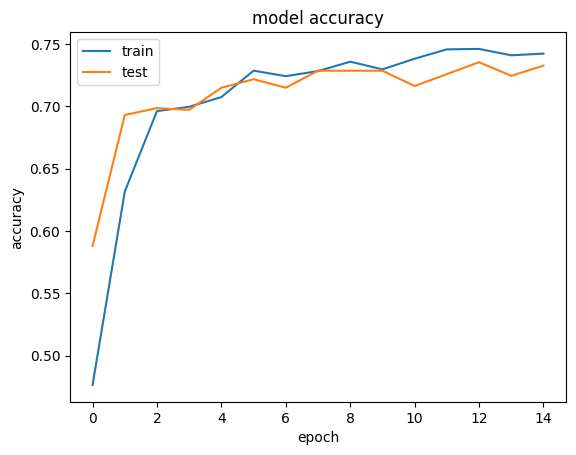

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

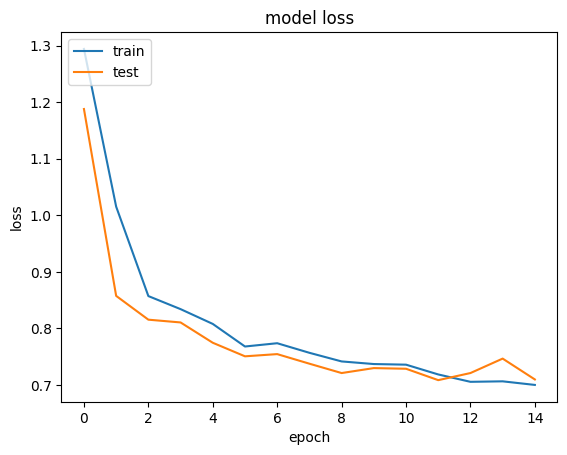

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print(max(history.history["accuracy"]))
print(max(history.history["val_accuracy"]))

0.7459883689880371
0.7353342175483704


In [ ]:
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=train_img_blnd.shape[1:]))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(32,(3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(32, (3,3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(900))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
# Output classes are 10
    model.add(Dense(5))
    model.add(Activation('softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
# Use the optimizer in your model.compile() or model.fit() calls
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
b_history = model.fit(train_img_blnd, dummies_train, batch_size=128, validation_data = (test_img_blnd, dummies_test), epochs=15)

Epoch 1/15
23/23 [==============================] - 17s 651ms/step - loss: 1.2647 - accuracy: 0.5992 - val_loss: 1.4822 - val_accuracy: 0.2606
Epoch 2/15
23/23 [==============================] - 17s 708ms/step - loss: 0.9252 - accuracy: 0.6794 - val_loss: 1.5288 - val_accuracy: 0.2606
Epoch 3/15
23/23 [==============================] - 14s 602ms/step - loss: 0.8221 - accuracy: 0.7026 - val_loss: 1.5206 - val_accuracy: 0.2606
Epoch 4/15
23/23 [==============================] - 13s 561ms/step - loss: 0.7686 - accuracy: 0.7214 - val_loss: 1.5946 - val_accuracy: 0.2606
Epoch 5/15
23/23 [==============================] - 12s 530ms/step - loss: 0.7379 - accuracy: 0.7357 - val_loss: 1.6271 - val_accuracy: 0.2606
Epoch 6/15
23/23 [==============================] - 14s 597ms/step - loss: 0.7190 - accuracy: 0.7395 - val_loss: 1.6554 - val_accuracy: 0.2606
Epoch 7/15
23/23 [==============================] - 12s 532ms/step - loss: 0.7148 - accuracy: 0.7409 - val_loss: 1.7703 - val_accuracy: 0.2606

In [ ]:
print(max(b_history.history["accuracy"]))
print(max(b_history.history["val_accuracy"]))

0.7842267155647278
0.2673942744731903


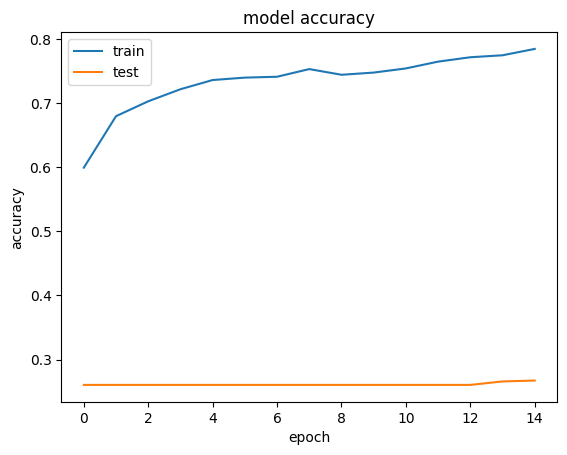

In [ ]:
plt.plot(b_history.history["accuracy"])
plt.plot(b_history.history["val_accuracy"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

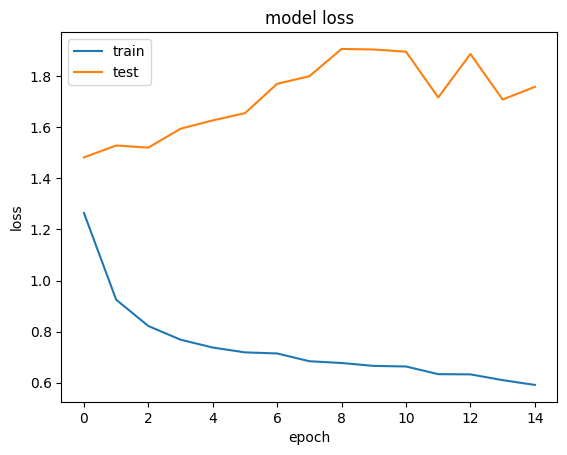

In [ ]:
plt.plot(b_history.history["loss"])
plt.plot(b_history.history["val_loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()